In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# read the catapult and vivado csv files first and then 
# process data and make comparisons

cHistdf = pd.read_csv("./catapult_histogram.csv", index_col=0)
vHistdf = pd.read_csv("./final_result_impl_histogram.csv", index_col=0)

# cHist cutting out unneccesary optimizations
#cHistdf = cHistdf[(cHistdf['knob_I_B'] == 0)]
# removing interleave optimizations
#cHistdf = cHistdf[(cHistdf['knob_KNOB_DATA_BLOCK_INTERLEAVE'] > 1000)]
cHistdf = cHistdf.drop(columns=['knob_I_B'])

cHistdf['resRatio'] = cHistdf['obj2']/2586150
cHistdf['1/obj2'] = 1/cHistdf['obj2']
print(cHistdf.count())
# get common columns 
cmn_col = np.intersect1d(cHistdf.columns, vHistdf.columns)
print("\ncommon columns: ", cmn_col)

#vivHistdf cutting out unneccesary optimizations
vHistdf = vHistdf[(vHistdf['knob_SIMD']==1)]
vHistdf = vHistdf[(vHistdf['knob_COMPUTE_UNITS']==1)]
vHistdf = vHistdf[(vHistdf['knob_ACCUM_SMEM']==0)]
vHistdf = vHistdf[(vHistdf['knob_PIPE_FACTOR']==0)]
vHistdf['1/obj2'] = 1/vHistdf['obj2']
vHistdf['resRatio'] = vHistdf['obj2']/2586150
print(vHistdf.count())

knob_HIST_SIZE                     1936
knob_NUM_HIST                      1936
knob_KNOB_UNROLL_LLM               1936
knob_UNROLL_FACTOR                 1936
knob_KNOB_DATA_BLOCK_INTERLEAVE    1936
obj1                               1936
obj2                               1936
resRatio                           1936
1/obj2                             1936
dtype: int64

common columns:  ['knob_HIST_SIZE' 'knob_NUM_HIST' 'knob_UNROLL_FACTOR' 'obj1' 'obj2']
knob_NUM_HIST           1004
knob_HIST_SIZE          1004
knob_NUM_HIST.1         1004
knob_NUM_WORK_GROUPS    1004
knob_SIMD               1004
knob_COMPUTE_UNITS      1004
knob_ACCUM_SMEM         1004
knob_UNROLL_FACTOR      1004
knob_PIPE_FACTOR        1004
obj1                    1004
obj2                    1004
1/obj2                  1004
resRatio                1004
dtype: int64


(0.0025, 0.0045)

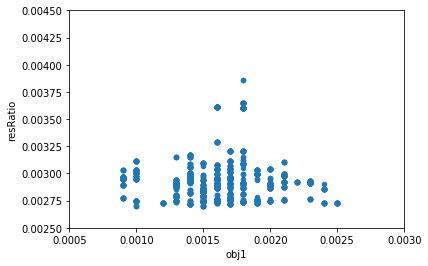

In [84]:
ax = cHistdf.plot(x='obj1', y='resRatio', kind='scatter')
ax.set_xlim(0.0005, 0.003)
ax.set_ylim(0.0025, 0.0045)

(7e-05, 0.0002)

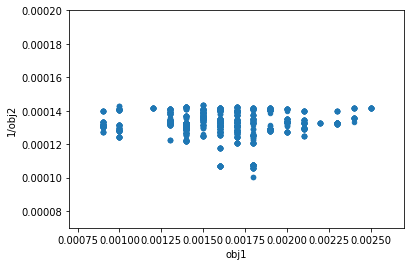

In [85]:
ax2 = cHistdf.plot(x='obj1', y='1/obj2', kind='scatter')
ax2.set_xlim(0.0007, 0.0027)
ax2.set_ylim(0.00007, 0.00020)

(0, 0.04)

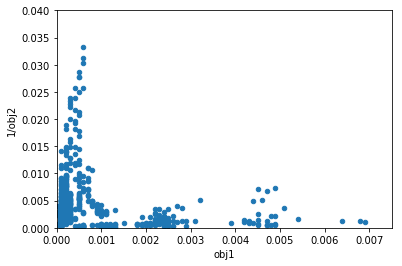

In [86]:
vivax = vHistdf.plot(x='obj1', y='1/obj2', kind='scatter')
vivax.set_xlim(0, 0.0075)
vivax.set_ylim(0,0.04)

(0, 0.003)

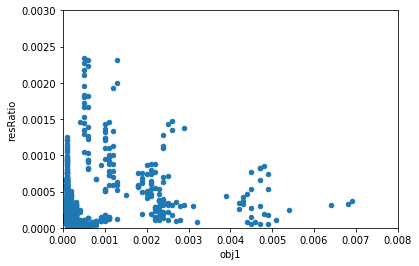

In [87]:
vivax2 = vHistdf.plot(x='obj1', y='resRatio', kind='scatter')
vivax2.set_xlim(0, 0.008)
vivax2.set_ylim(0, 0.003)